In [1]:
import json 
f = open("answered_data_10k.in").read().split("\n")
train_set = f[1:9001]
test_set = f[9002:-1]
train = [json.loads(i) for i in train_set]
test = [json.loads(i) for i in test_set]
questions = train + test 

In [197]:
# Create the list of topics 
topic_list = []
for question in questions:
    if len(question["topics"]) > 0:
        for topic in question["topics"]:
            topic_list = topic_list + [topic["name"]]
            
#print(list(set(topic_list)))
topic_list = list(set(topic_list))
print(len(topic_list))

8762


In [118]:
question_list = []
final_topic_list = []
for topic in topic_list:
    temp = []
    for question in questions:
        context = [i["name"] for i in question["topics"]]
        if topic in context:
            temp.append(question['question_text'])   
    if len(temp) >= 5:
        question_list.append(temp)
        final_topic_list.append(topic)
topic_list = final_topic_list

In [119]:
question_list[0]

['What kind of equation will Narendra Modi share with businessmen like Mukesh Ambani if he becomes the PM?',
 "What is the success of Narendra Modi's social media campaign ? What worked and what did not work?",
 'Can Narendra Modi be made Prime Minister of India?',
 'Why are valid arguments against Narendra Modi downvoted by quorans?',
 'How are Sajjan Kumar, Jagdish Tytler  able to sleep at night?',
 "Do you agree with Rahul Gandhi's comparision of India to a beehive?",
 'Who are the uncorrupt politicians in India today?']

In [120]:
test[0]

{'question_text': 'Why are many educators against rote memorization?',
 'context_topic': {'followers': 81915, 'name': 'Edtech'},
 'topics': [{'followers': 5572, 'name': 'Human Memory'},
  {'followers': 333812, 'name': 'Education'},
  {'followers': 81915, 'name': 'Edtech'}],
 'question_key': 'AAEAALPskzeH7yEqd7o+nDWmMJnjAPedwWOaxnGKWO0ZXGsF',
 'anonymous': False}

In [121]:
total_questions = [i['question_text'] for i in questions]

In [122]:
from nltk import word_tokenize
from nltk.corpus import stopwords
def normalize(string):
    lst = word_tokenize(string)
    lst =[word.lower() for word in lst if word.isalpha()]
    lst = [w for w in lst if not w in stopwords.words('english')]
    return(lst)
print(normalize("What is the gradient of the log likelihood function in  multinomial logistic regression?"))

['gradient', 'log', 'likelihood', 'function', 'multinomial', 'logistic', 'regression']


In [123]:
from gensim import models
from gensim.models.doc2vec import TaggedDocument
docs = []
for index, item in enumerate(topic_list):
    question = " ".join(question_list[index])
    question = normalize(question)
    docs.append(TaggedDocument(words=question, tags=[item]))

In [124]:
import gensim
model = gensim.models.Doc2Vec(vector_size= 200, window= 3, min_count= 0, workers=4, epochs= 40)
model.build_vocab(docs)

In [125]:
model.train(docs, total_examples=model.corpus_count, epochs=model.iter)

/Users/samriddhisinha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """Entry point for launching an IPython kernel.


In [126]:
topic_list[0]
v = normalize(" ".join(question_list[0]))
new_vector = model.infer_vector(v)

In [127]:
sims = model.docvecs.most_similar([new_vector])

In [128]:
sims

[('Narendra Modi', 0.9076288938522339),
 ('Italy', 0.8100892305374146),
 ('Malaysia', 0.806121289730072),
 ('Thailand', 0.7989392280578613),
 ('Government Leaders and Politicians', 0.7941255569458008),
 ('Pakistan', 0.7893249988555908),
 ('Traffic', 0.7881889343261719),
 ('Muslims', 0.786828875541687),
 ('Hindu Mythology', 0.785515546798706),
 ('Fraud', 0.7854477167129517)]

In [103]:
model.docvecs[0]

array([-0.51128054,  0.16622885, -0.09665149, -0.10761113,  0.22906348,
        0.27958447, -0.45562935, -0.21857081, -0.32309347, -0.11290986,
        0.33438525,  0.260576  , -0.17534818, -0.15424928,  0.3976475 ,
       -0.12527218, -0.32646924, -0.03553891,  0.01065946, -0.28677174,
        0.30294332, -0.12917349, -0.00961373,  0.29996324, -0.26978362,
        0.06984522, -0.00777686,  0.2593202 ,  0.06476465,  0.3984293 ,
        0.05178346, -0.22881095,  0.27749172, -0.6215864 ,  0.28114277,
        0.7356445 ,  0.5027659 ,  0.34283808,  0.42751876,  0.11608803,
        0.215015  , -0.21994627,  0.35024744, -0.46035957, -0.12760904,
        0.34656712, -0.2788846 , -0.34857896,  0.08869379, -0.3277905 ,
       -0.38234517, -0.11257434, -0.11948769, -0.02129064,  0.20298053,
        0.542678  , -0.12476667, -0.5802649 , -0.00187753, -0.12970805,
        0.2912424 , -0.22362942, -0.14180821,  0.21643765, -0.30660117,
       -0.32597858, -0.8228911 ,  0.39147824,  0.45930934,  0.13

In [104]:
model.docvecs.doctag_syn0

/Users/samriddhisinha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  """Entry point for launching an IPython kernel.


array([[-0.51128054,  0.16622885, -0.09665149, ...,  0.90441096,
        -0.20141658, -0.14490381],
       [-1.7649946 , -0.8850348 ,  1.0393354 , ..., -0.56674653,
        -0.95500946, -0.04873444],
       [-1.0921516 , -0.11721303,  0.02135609, ...,  0.09897545,
        -0.04768512, -0.34650004],
       ...,
       [-0.54627424, -0.2745405 , -0.17318411, ...,  0.07198118,
        -0.2532572 , -0.10942733],
       [-0.7118413 , -0.09812168,  0.07976667, ..., -0.29185018,
        -0.5906264 , -0.15215701],
       [-0.37566677, -0.14633629, -0.4618716 , ...,  0.03535339,
        -0.14305544, -0.20114605]], dtype=float32)

In [164]:
from sklearn.cluster import KMeans
from sklearn import metrics
import pylab as pl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
kmeans_model = KMeans(n_clusters= 60, init='k-means++', max_iter=200)  
X = kmeans_model.fit(model.docvecs.doctag_syn0)
labels= kmeans_model.labels_.tolist()

l = kmeans_model.fit_predict(model.docvecs.doctag_syn0)
pca = PCA(n_components=3).fit(model.docvecs.doctag_syn0)
datapoint = pca.transform(model.docvecs.doctag_syn0)


/Users/samriddhisinha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  import sys
/Users/samriddhisinha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  # Remove the CWD from sys.path while we load stuff.
/Users/samriddhisinha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  # This is added back by InteractiveShellApp.init_path()
/Users/samriddhisinha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  if sys.path[0] == '':


In [169]:
len(labels)

900

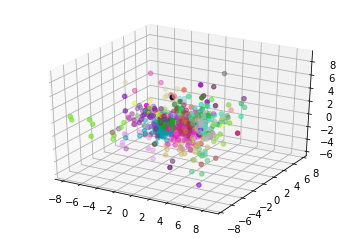

In [190]:
plt.figure
from itertools import cycle
cycol = cycle('bgrcmk')
from random import randint
color = '#{:06x}'.format(randint(0, 256**3))
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

#label1 = ["#FFFF00", "#008000", "#0000FF", "#800080", "#D3D3D3", "#FFC0CB", "#F0E68C", "#9932CC", "#f5f5dc", "#b87333"]

label1 = ['#{:06x}'.format(randint(0, 256**3)) for i in range(60)]
color = [label1[i] for i in labels]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(datapoint[:, 0], datapoint[:, 1], datapoint[:, 2], c=color)
#for i in range(900):
#    ax.annotate(topic_list, (datapoint[:, 0], datapoint[:, 1], datapoint[:, 2]))
centroids = kmeans_model.cluster_centers_
centroidpoint = pca.transform(centroids)
#plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
#plt.show()
plt.show()

In [ ]:
word_centroid_map = dict(zip( model.docvecs.offset2doctag, l))

In [159]:

for cluster in range(0,100): 
    print("\nCluster %d" % cluster)
    words = []
    for i in range(0,len(word_centroid_map.values())):
        if(list(word_centroid_map.values())[i] == cluster ):
            words.append(list(word_centroid_map.keys())[i])
    print(words)



Cluster 0
['Web Application Frameworks', 'Front-End Web Development', 'User Experience', 'APIs', 'User Interfaces', 'HTML', 'YouTube', 'jQuery', 'Cascading Style Sheets', 'Online Video', 'iPad', 'Web Applications', 'Adobe Illustrator', 'Database Systems', 'Graphic Design', 'Mobile UI Design', 'Game Development', 'HTML5', 'Photography', 'iPad Applications', 'Design', 'Ruby (programming language)', 'Adobe Photoshop', 'Interaction Design', 'User Interface Design', 'Video Editing', 'WordPress Plugins', 'iOS Applications']

Cluster 1
['History of India', 'Pakistan', 'Indian People', 'Facts and Trivia', 'India Against Corruption', 'China', 'Mumbai', 'Cricket (sport)', 'Politics in India', 'Culture of India']

Cluster 2
['Small Businesses', 'Investing', 'Marketing', 'Business Models', 'Business Strategy', 'Business', 'Finance']

Cluster 3
['Web Marketing', 'Twitter', 'Blogs', 'Blogging', 'Advertising and Advertisements', 'Digital Marketing', 'WordPress', 'Search Engine Optimization (SEO)', '

['Relationship Advice', 'Fashion and Style', 'Gender Differences', 'Racism', 'Names and Naming', 'Manners and Etiquette', 'Gender', 'Beauty', 'Cheating (relationship and marital infidelity)', 'Breaking Bad (TV series)', 'Online Dating', 'Jokes', 'Needs Improvement', 'Dating Etiquette', 'Race and Ethnicity', 'Crime', 'Sexism', 'Sex Workers and Prostitution', 'Family and Families', 'Celebrities', 'Romance (love)', 'Girls and Young Women', 'Suicide', "Men's Fashion", 'Abortion', 'Dogs (pets)', 'Attractive Women', 'Aging (biology)']

Cluster 50
['Grammar', 'Languages', 'Words', 'English (language)']

Cluster 51
['Algorithms', 'Machine Learning']

Cluster 52
['San Francisco', 'London, UK', 'Real Estate', 'San Francisco Bay Area', 'New York City', 'International Travel', 'Air Travel', 'Travel', 'Palo Alto, CA', 'Airlines', 'Tourism']

Cluster 53
['Angel Investors', 'Lean Startups', 'Angel Investing', 'Startup Founders and Entrepreneurs', 'Venture Capital', 'Startup Advice and Strategy', 'Ent

In [61]:
print(word_centroid_map.values())

dict_values([5, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 9, 1, 9, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 1, 6, 3, 5, 3, 3, 3, 1, 1, 3, 3, 9, 3, 1, 3, 1, 3, 3, 1, 9, 1, 3, 3, 6, 1, 3, 3, 1, 3, 3, 9, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 9, 3, 3, 3, 1, 1, 3, 3, 9, 3, 1, 2, 0, 1, 0, 1, 1, 3, 3, 9, 0, 1, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 1, 1, 3, 3, 3, 3, 5, 3, 3, 3, 1, 4, 3, 3, 1, 9, 3, 9, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 1, 1, 3, 9, 3, 1, 1, 1, 1, 3, 3, 3, 9, 1, 1, 1, 1, 3, 1, 5, 3, 9, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 9, 3, 1, 3, 3, 9, 1, 3, 9, 3, 3, 8, 9, 1, 9, 3, 3, 3, 3, 1, 9, 3, 1, 6, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 9, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 9, 1, 1, 3, 3, 3, 3, 2, 1, 3, 6, 1, 1, 3, 3, 3, 3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 2, 3, 3, 3, 1, 3, 1, 1, 3, 3, 9, 3, 1, 3, 9, 1, 3, 3, 3, 3, 1, 3, 3, 1, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 1, 3, 2, 1, 1, 3, 3, 1, 3, 3, 8, 1, 9, 3, 3, 3, 3, 9, 3, 1, 8, 3, 3, 3, 3, 1, 3, 6, 3, 3, 3, 3, 3, 1, 

In [192]:
count = 0
for i in question_list:
    if len(i) > 1:
        count += 1 

In [78]:
topic_list[question_list.index(a)]

'Survey Questions'

In [79]:
len(question_list)

8762

In [193]:
count

900

In [199]:
question_list = []
final_topic_list = []
for topic in topic_list:
    temp = []
    for question in questions:
        context = [i["name"] for i in question["topics"]]
        if topic in context:
            temp.append(question['question_text'])   
    
    question_list.append(temp)
    final_topic_list.append(topic)
topic_list = final_topic_list

In [200]:
len(question_list)

8762